In [ ]:
#import the required libraries:
import numpy as np                                 #to creat lists to transform type of data for fit function
from random import randint                         #to creat our datasets
from sklearn.utils import shuffle                  #to get rid of any order on the dataset
from sklearn.preprocessing import MinMaxScaler     #to scale our samples from ranging 13-100 to ranging 0-1


#*******************************************************

In [ ]:
#import all the required tensorflow modules that needed to build the sequential model:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#these two are going to use when we train the model not when we build it
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

#***********************************

In [ ]:
#import all the neccessary packages from sklearn to creat confusion matrix:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#***********************************

In [ ]:
#creat to empty lists to hold data:
train_samples = []                                 #to hold our training samples
train_labels = []                                  #to hold our training labels

#***********************

In [ ]:
#creat to empty lists to hold data for the test set:
test_samples = []
test_labels = []

#*******************************************************

In [ ]:
#create the dataset:                              
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)                           #5% of individuals < 65 who did experience side effects

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)                           #5% of individulas >= 65 who did't experience side effects



for i in range(1000):                            
  random_younger = randint(13,64)              
  train_samples.append(random_younger)
  train_labels.append(0)                           #95% of individuals < 65 who did't experience side effects

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)                           #95% of individulas >= 65 who did experience side effects

  #*******************************************************

In [ ]:
#creat the test set:
for i in range(50):
  randome_younger = randint(13,64)
  test_samples.append(randome_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000):
  randome_younger = randint(13,64)
  test_samples.append(randome_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

  #***********************************

In [ ]:

#convert both lists into numpy array to make them readable for the fit function:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

#*******************************************************

In [ ]:
#convert both lists from testset into numpy array to make them readable for the predict function:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

#*******************************************************

In [ ]:
#shuffle our data to get rid of the order on dataset:         we shuffled before split for validation
train_labels, train_samples = shuffle(train_labels, train_samples)

#*******************************************************

In [ ]:
test_samples, test_labels = shuffle(test_samples, test_labels)

#*******************************************************

In [ ]:
#scale down the data from rang(13-100) to range(0-1):         for training set and test set!
scaler = MinMaxScaler(feature_range=(0,1))

#*******************************************************

In [ ]:
#transform our dataset which was in rnage of(13-100) to (0-1) :
scaled_training_samples = scaler.fit_transform(train_samples.reshape(-1,1))  

#*******************************************************

In [ ]:
#transform our test data which was in rnage of(13-100) to (0-1) :
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))
#*******************************************************

In [ ]:
#creating model:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

#*******************************************************

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#prepare the model for training:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#*******************************************************

In [ ]:
#training occurs whenever we use fit function:
model.fit(x=scaled_training_samples, y=train_labels, validation_split=0.01, batch_size=10, epochs=30, shuffle=True, verbose=2)

#*******************************************************

In [ ]:
#predict the test set and the output does not important too us:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

#***********************************

In [ ]:
for i in predictions:
  print(i)

  #***********************************

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

#***********************************

In [ ]:
for i in rounded_predictions:
  print(i)

  #***********************************

In [ ]:
#creat confusion matrix
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
#the plot function which is copied  from sklearn libraries
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#the labels for the confusion matrix
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[ 985   65]
 [  48 1002]]


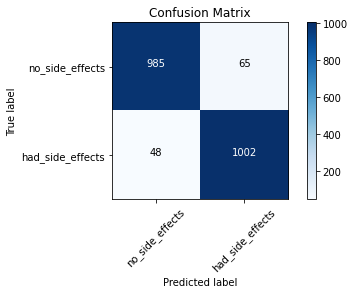

In [ ]:
#plot confusion matix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')